In [25]:
#arvore de decisão não é necessário reescalar
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [26]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [27]:
df.rename({'mileage_per_year':'quilometros_por_ano','model_year':'idade_modelo','price':'preco','sold':'vendido'},axis=1,inplace=True)

In [28]:
df.head()

,Unnamed: 0,quilometros_por_ano,idade_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [29]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
df.head()

,quilometros_por_ano,idade_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [31]:
from datetime import datetime
ano_atual = datetime.today().year
df.quilometros_por_ano = df.quilometros_por_ano.apply(lambda x: int(round((x/1.60934))))
df.idade_modelo = df.idade_modelo.apply(lambda x: ano_atual-x)
df.vendido = df.vendido.apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,quilometros_por_ano,idade_modelo,preco,vendido
0,13547,20,30941.02,1
1,4873,22,40557.96,1
2,4417,14,89627.50,0
3,16667,5,95276.14,0
4,4931,6,117384.68,1


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

In [45]:
x = df[['quilometros_por_ano','idade_modelo','preco']]
y = df['vendido']
seed= 101
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,stratify=y)

model = DecisionTreeClassifier(max_depth = 3)
model.fit(raw_train_x,train_y)
predict_model = model.predict(raw_test_x)
accuracy = accuracy_score(test_y,predict_model)*100

dummy = DummyClassifier()
dummy.fit(train_x,train_y)
predict_dummy = dummy.predict(test_x)
accuracy_dummy = accuracy_score(test_y,predict_dummy)*100

print(f'A acurácia do modelo dummy foi de {accuracy_dummy.round(3)}% e a do modelo de árvore de decisão foi {accuracy.round(3)}%')


A acurácia do modelo dummy foi de 52.4% e a do modelo de árvore de decisão foi 78.08%


C:\Users\MASTER\anaconda3\envs\mateus_pandas\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


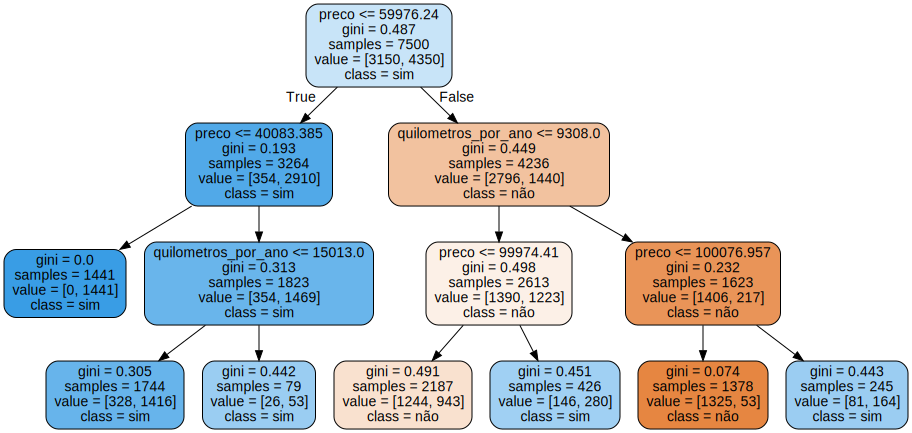

In [46]:
from sklearn.tree import export_graphviz
features = x.columns
dot_data = export_graphviz(model,out_file=None, feature_names = features, filled = True, rounded = True,
                          class_names = ["não","sim"])
graph = graphviz.Source(dot_data)
graph